In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA


df = pd.read_csv('dataset.csv')
print(df.head())

# Removing blanks
df.dropna(axis=0, how='any', inplace=True)
print(df.head())

# Removing duplicates
print("Before duplicates : ", df.shape)
df.drop_duplicates(subset=['date','Temperature','Humidity','Light','CO2'], keep='first',inplace=True)
print("After duplicates : ", df.shape)

              date  Temperature   Humidity       Light          CO2
0  2/11/2015 14:48      21.7600  31.133333  437.333333  1029.666667
1  2/11/2015 14:49      21.7900  31.000000  437.333333  1000.000000
2  2/11/2015 14:50      21.7675  31.122500  434.000000  1003.750000
3  2/11/2015 14:51      21.7675  31.122500  439.000000  1009.500000
4  2/11/2015 14:51      21.7900  31.133333  437.333333  1005.666667
              date  Temperature   Humidity       Light          CO2
0  2/11/2015 14:48      21.7600  31.133333  437.333333  1029.666667
1  2/11/2015 14:49      21.7900  31.000000  437.333333  1000.000000
2  2/11/2015 14:50      21.7675  31.122500  434.000000  1003.750000
3  2/11/2015 14:51      21.7675  31.122500  439.000000  1009.500000
4  2/11/2015 14:51      21.7900  31.133333  437.333333  1005.666667
Before duplicates :  (9752, 5)
After duplicates :  (9725, 5)


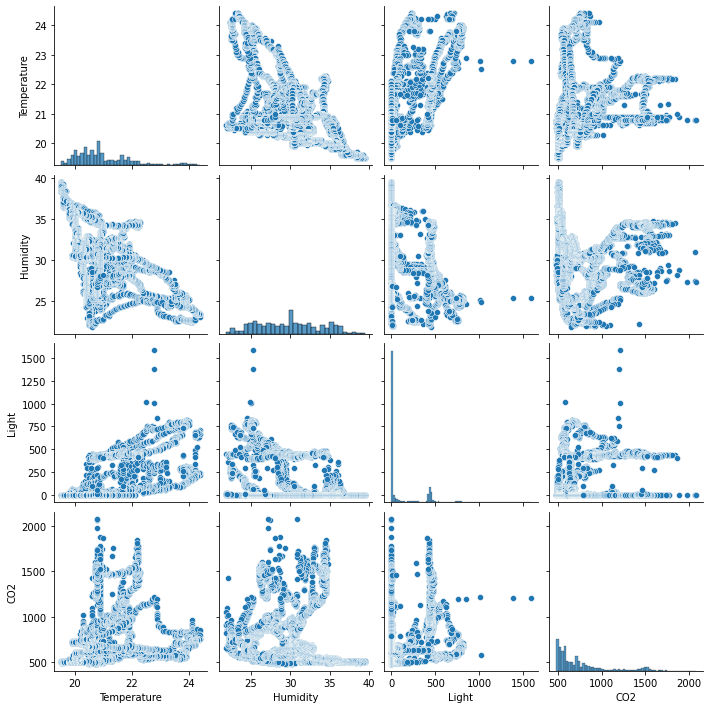

In [2]:
sns.pairplot(df) 


C:\Users\chya_\AppData\Local\Temp/ipykernel_13004/2887531029.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)


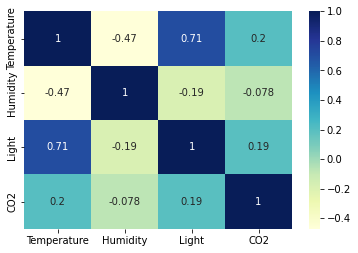

In [3]:
# Creating a heat map showing correlation
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
# Showing the heat map
plt.show()


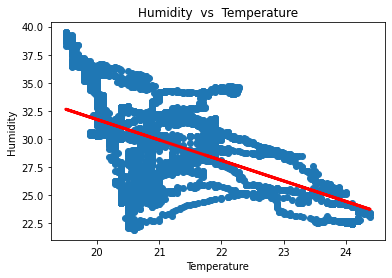

In [4]:
X = df.loc[:,'Temperature'].values.reshape(-1,1)# defining the x
Y = df.loc[:, 'Humidity'].values.reshape(-1,1)#defining y
lm = LinearRegression()#assigning Linear regression
lm.fit(X, Y)#bulding the model the data
Y_pred = lm.predict(X)#making a prediction
plt.scatter(X, Y)#scatterploting x and y
plt.plot(X, Y_pred, color='red', linewidth =3)#making the line and giving red color
plt.title("Humidity  vs  Temperature")#title
plt.xlabel("Temperature")# x axel
plt.ylabel("Humidity")#y axel
plt.show()

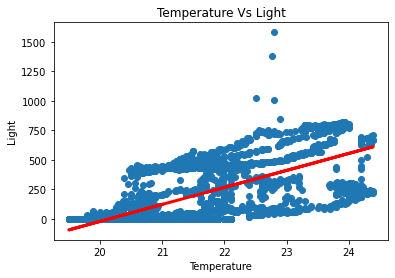

In [5]:
X = df.loc[:,'Temperature'].values.reshape(-1,1)# defining the x
Y = df.loc[:, 'Light'].values.reshape(-1,1)#defining y
lm = LinearRegression()#assigning Linear regression
lm.fit(X, Y)#bulding the model the data
Y_pred = lm.predict(X)#making a prediction
plt.scatter(X, Y)#scatterploting x and y
plt.plot(X, Y_pred, color='red', linewidth =3)#making the line and giving red color
plt.title("Temperature Vs Light")#title
plt.xlabel("Temperature")# x axel
plt.ylabel("Light")#y axel
plt.show()

              date  Temperature   Humidity       Light          CO2
0  2/11/2015 14:48      21.7600  31.133333  437.333333  1029.666667
1  2/11/2015 14:49      21.7900  31.000000  437.333333  1000.000000
2  2/11/2015 14:50      21.7675  31.122500  434.000000  1003.750000
3  2/11/2015 14:51      21.7675  31.122500  439.000000  1009.500000
4  2/11/2015 14:51      21.7900  31.133333  437.333333  1005.666667
(40,) (40,)
Mean Absolute Error (MAE): 0.94


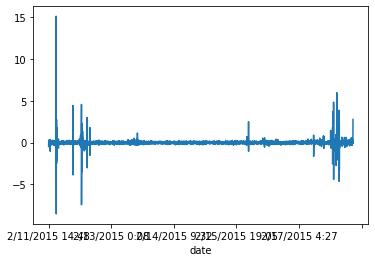

In [6]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

df = pd.read_csv('dataset.csv')
print(df.head())

# Removing blanks
df.dropna(axis=0, how='any', inplace=True)

# Removing duplicates
df.drop_duplicates(subset=['date','Temperature','Humidity','Light','CO2'], keep='first',inplace=True)
# Making all the values smaller in CO2 column
df_log= np.sqrt(df['CO2'])

# Making the data stationary by subtracting a row with previous row
df['CO2']= df_log.diff()

co2=[]
co2 = df['CO2']

# Setting index of panda data serie to values of date column
co2.index = df['date']
co2.plot()
co2.index = pd.DatetimeIndex(co2.index).to_period('1min')

# Division of train and test datasets
train = co2.iloc[:9194]
test = co2.iloc[9194:9234]
model=ARIMA(train,order=(1,0,1)) # p,d and q
model_fit=model.fit()
model_fit.summary()

# Forecasting the future values of Train dataset
pred_y=model_fit.predict(start=9195,end=9234,dynamic=False)

# Actual test values
y_test = df['CO2'].iloc[9194:9234]

print(y_test.shape, pred_y.shape)

# Mean Absolute Error (MAE)
MAE = np.mean(abs(pred_y - y_test))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))
